# Graded Lab Assignment: Logistic Regression (10 points)

In this assignment you will classify hand-written digits using logistic regression.

The assignment follows Andrew Ng's explanation of Logistic Regression and (re)watching his videos could be useful (Week 3)

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline. 

### Deadline Tuesday, October 10th, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

The points for the assignment are distributed as follows:
* The implementation
    - prediction_function (0.5)
    - cost_function (1)
    - compute_gradient (1)
    - correct double for loop (2)
    - correct stop condition (0.5)
    - preventing overfitting (1)
    - systematically choosing learning rate (1) 
    - best score analysis (1)
    - summary (1)
    - comments (0.5)
    - code (0.5)
    

In [3]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Scikit-learn is a toolkit that has several datasets built in. You first need to install the toolkit: http://scikit-learn.org/stable/install.html

The MNIST dataset that you will be using for this assignment contains images of hand-written digits that are only 8 by 8 pixels, which means the algorithm (logistic regression) should run on every computer.

The code in the cell below shows how to work with the digits dataset and  how to visualize it. As you can see the numbers are not very clear in 8x8 pixels images, this means we cannot expect our logistic regression will have a very high classification score.

The numbers shown are: 
 [[0 1 2 3 4]
 [5 6 7 8 9]]


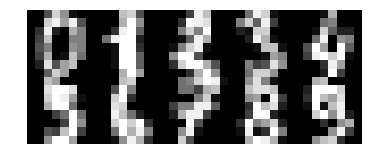

In [4]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))

print("The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10])))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of logistic regression. Don't change the definitions of the functions and input parameters.

(1) Make sure that you do not overfit by keeping track of the score on the test set and implementing a correct stop condition. 
(2) Systematically pick a learning rate alpha that makes sure the algorithm learns in a smooth and stable manner (show how you do it). 
(3) Plot how your score on the test set improves over time. My best score was about 85% correct!
(4) Write a short summary of what you have done (and why) to accomplish steps (1), (2) and (3).
(5) Make sure to comment your code!

In [51]:
#The prediction function 
def prediction_function(x,theta):
    z = dot(theta.T, x)
    x_predict = 1/(1+exp(-z))
    return x_predict

In [ ]:
#The cost function J 
def cost_function(x_predict,y): 
    cost = cost = y * log(x_predict) + (1 - y) * log(1 - x_predict)
    return - sum(cost) / size(x_predict)

In [41]:
#The gradient descent step 
def compute_gradient(x_predict, y, x):
    dtheta = outer((x_predict-y),x)
    return dtheta

93.93939393939394


<function matplotlib.pyplot.show>

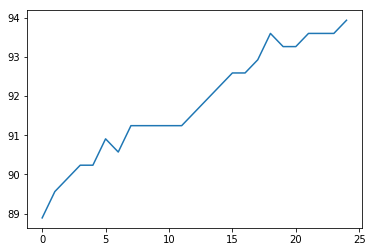

In [93]:
alpha = 0.001 #best alpha for the highest accuracy 
iterations = 25 
theta = np.zeros((64,10)) #a theta(64,1) is created  for every class, and there are ten classes (number 0-9)


#The target datasets 
x = np.reshape(digits.images[:1500],(1500,64))
x_test = np.reshape(digits.images[1500:],(297,64))


target = digits.target[:1500] #these are the samples for the training
target_test = digits.target[1500:] # these are the samples for the test

accuracies = []

for i in range(iterations): #applies gradient descent to find the optimal values for theta
    cost = 0
    for j in range(x.shape[0]):
        x_predict = prediction_function(x[j,:].T,theta) #computes the x_predict for every sample
        y = np.zeros(10) #creates a vector with 10 zeros, representing the different classes 
        y[target[j]] = 1 #sets the right class to 1
            
        cost = cost_function(x_predict,y)
        dtheta = compute_gradient(x_predict,y, x[j, :])
        theta = np.add(theta, np.multiply(-(alpha/(x.shape[0])),dtheta.T))
   
        #finally, the values for theta are found, for which the cost function is the smallest. 
    
    #testing part 
    score = 0
    for k in range(x_test.shape[0]): 
        x_pred_test = prediction_function(x[k,:], theta)
        if argmax(x_pred_test) == target[k]: #here we check if the highest prediction is equal to the target, so the value which is was supposed to be. 
            score = score + 1  #if the highest prediction and the target are the same, the score (which stands for the number of correct tests) is updated by 1.
    accuracy = (score / x_test.shape[0]) *100 # here the accuracy percentage is calculated by dividing the score by the number of tests 
    accuracies.append(accuracy) #for every iteration, the accuracy is stored in a list
    
print(max(accuracies)) #after all the iterations, the highest accuracy is printed. 
            
plt.plot(range(iterations), accuracies) #plots the graph of the iterations vs. the accuracies
plt.show

Summary

This is a logistic regression model for the classification of handwritten digits. The model is trained on 1500 images that consist of 64 pixels (8x8), which are each represented in a (1,64) array. Theta is constructed as a 64X10 matrix, consisting of zeros. After the iterations, all the numbers are given a theta value. 

To see how many tests resulted in the correct number, I compared the maximum probabilty to the target for every test sample. If the values where equal, the score was updated by 1. I calculated the accuracy percentage by dividing the total score by the number of tests done. 

I found that the best alpha was 0.001, after I compared it to the alphas 0.1, 0.01 and 0.0001, as it gave the highest accuracy.  

alpha 0.001 and 25 iterations = 93.93939393939394 accuracy 